In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: RELX
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


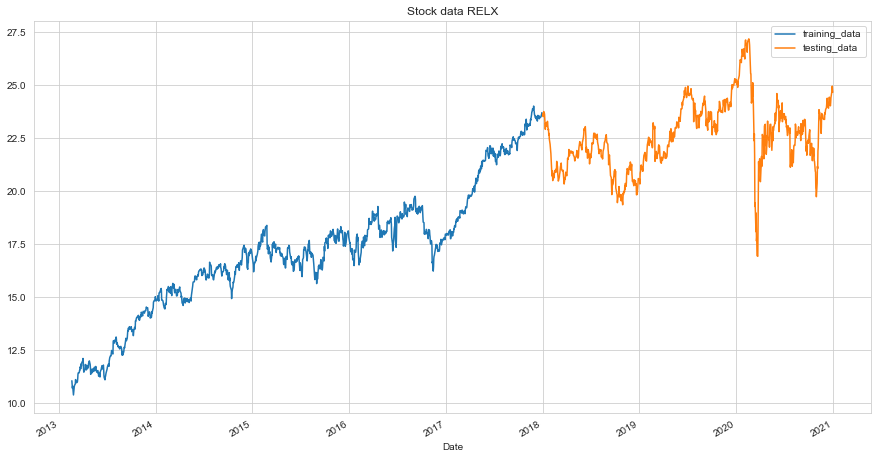

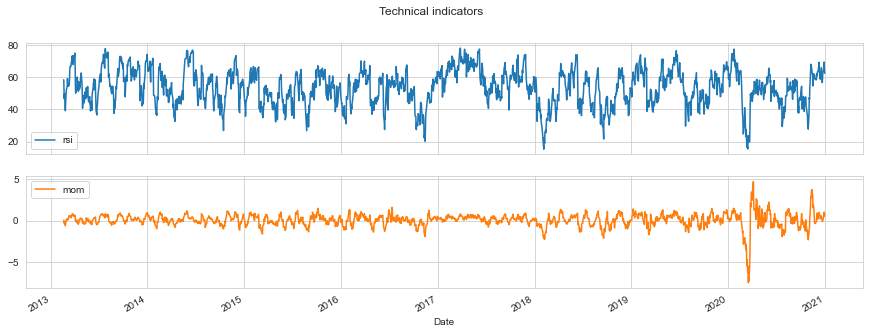

In [2]:
stock_name = 'relx'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1368.24, duration: 0:00:00.278061
episode: 2/2000, episode end value: 1445.81, duration: 0:00:00.245055
episode: 3/2000, episode end value: 1376.54, duration: 0:00:00.265059
episode: 4/2000, episode end value: 1386.14, duration: 0:00:00.211047
episode: 5/2000, episode end value: 1379.39, duration: 0:00:00.223051
episode: 6/2000, episode end value: 1359.98, duration: 0:00:00.211047
episode: 7/2000, episode end value: 1369.47, duration: 0:00:00.275065
episode: 8/2000, episode end value: 1362.77, duration: 0:00:00.301064
episode: 9/2000, episode end value: 1379.02, duration: 0:00:00.310073
episode: 10/2000, episode end value: 1398.57, duration: 0:00:00.306067
episode: 11/2000, episode end value: 1398.22, duration: 0:00:00.298068
episode: 12/2000, episode end value: 1402.39, duration: 0:00:00.289064
episode: 13/2000, episode end value: 1405.27, duration: 0:00:00.374086
episode: 14/2000, episode end value: 1405.92, duration: 0:00:00.335074
episode: 15/200

episode: 117/2000, episode end value: 1388.12, duration: 0:00:00.277063
episode: 118/2000, episode end value: 1359.76, duration: 0:00:00.311069
episode: 119/2000, episode end value: 1397.12, duration: 0:00:00.300068
episode: 120/2000, episode end value: 1382.00, duration: 0:00:00.306067
episode: 121/2000, episode end value: 1386.30, duration: 0:00:00.349078
episode: 122/2000, episode end value: 1418.92, duration: 0:00:00.320071
episode: 123/2000, episode end value: 1377.68, duration: 0:00:00.287065
episode: 124/2000, episode end value: 1371.60, duration: 0:00:00.327073
episode: 125/2000, episode end value: 1372.40, duration: 0:00:00.320074
episode: 126/2000, episode end value: 1376.56, duration: 0:00:00.321068
episode: 127/2000, episode end value: 1408.53, duration: 0:00:00.351072
episode: 128/2000, episode end value: 1403.47, duration: 0:00:00.354883
episode: 129/2000, episode end value: 1375.98, duration: 0:00:00.398088
episode: 130/2000, episode end value: 1376.31, duration: 0:00:00

episode: 231/2000, episode end value: 1360.71, duration: 0:00:00.475101
episode: 232/2000, episode end value: 1362.31, duration: 0:00:00.440098
episode: 233/2000, episode end value: 1431.86, duration: 0:00:00.365081
episode: 234/2000, episode end value: 1407.06, duration: 0:00:00.335076
episode: 235/2000, episode end value: 1435.77, duration: 0:00:00.370083
episode: 236/2000, episode end value: 1346.83, duration: 0:00:00.298067
episode: 237/2000, episode end value: 1363.41, duration: 0:00:00.325068
episode: 238/2000, episode end value: 1365.53, duration: 0:00:00.422097
episode: 239/2000, episode end value: 1361.51, duration: 0:00:00.382084
episode: 240/2000, episode end value: 1359.40, duration: 0:00:00.444100
episode: 241/2000, episode end value: 1361.63, duration: 0:00:00.446104
episode: 242/2000, episode end value: 1361.19, duration: 0:00:00.408088
episode: 243/2000, episode end value: 1363.76, duration: 0:00:00.496114
episode: 244/2000, episode end value: 1363.54, duration: 0:00:00

episode: 345/2000, episode end value: 1360.01, duration: 0:00:00.462104
episode: 346/2000, episode end value: 1355.36, duration: 0:00:00.535118
episode: 347/2000, episode end value: 1387.12, duration: 0:00:00.431099
episode: 348/2000, episode end value: 1356.85, duration: 0:00:00.452100
episode: 349/2000, episode end value: 1356.54, duration: 0:00:00.485109
episode: 350/2000, episode end value: 1357.59, duration: 0:00:00.476108
episode: 351/2000, episode end value: 1362.30, duration: 0:00:00.486115
episode: 352/2000, episode end value: 1358.26, duration: 0:00:00.441094
episode: 353/2000, episode end value: 1352.70, duration: 0:00:00.467105
episode: 354/2000, episode end value: 1364.40, duration: 0:00:00.557131
episode: 355/2000, episode end value: 1372.25, duration: 0:00:00.467104
episode: 356/2000, episode end value: 1360.32, duration: 0:00:00.428098
episode: 357/2000, episode end value: 1373.94, duration: 0:00:00.484110
episode: 358/2000, episode end value: 1370.94, duration: 0:00:00

episode: 459/2000, episode end value: 1364.60, duration: 0:00:00.430096
episode: 460/2000, episode end value: 1349.35, duration: 0:00:00.466102
episode: 461/2000, episode end value: 1356.22, duration: 0:00:00.410095
episode: 462/2000, episode end value: 1356.46, duration: 0:00:00.476106
episode: 463/2000, episode end value: 1347.94, duration: 0:00:00.330082
episode: 464/2000, episode end value: 1351.80, duration: 0:00:00.391086
episode: 465/2000, episode end value: 1392.49, duration: 0:00:00.323068
episode: 466/2000, episode end value: 1357.25, duration: 0:00:00.463004
episode: 467/2000, episode end value: 1363.19, duration: 0:00:00.416094
episode: 468/2000, episode end value: 1372.84, duration: 0:00:00.356079
episode: 469/2000, episode end value: 1356.31, duration: 0:00:00.369081
episode: 470/2000, episode end value: 1365.37, duration: 0:00:00.455102
episode: 471/2000, episode end value: 1375.00, duration: 0:00:00.415091
episode: 472/2000, episode end value: 1360.51, duration: 0:00:00

episode: 573/2000, episode end value: 1365.80, duration: 0:00:00.438097
episode: 574/2000, episode end value: 1365.49, duration: 0:00:00.472107
episode: 575/2000, episode end value: 1365.40, duration: 0:00:00.515116
episode: 576/2000, episode end value: 1365.83, duration: 0:00:00.519121
episode: 577/2000, episode end value: 1365.66, duration: 0:00:00.493110
episode: 578/2000, episode end value: 1366.01, duration: 0:00:00.422094
episode: 579/2000, episode end value: 1365.37, duration: 0:00:00.389091
episode: 580/2000, episode end value: 1364.10, duration: 0:00:00.385084
episode: 581/2000, episode end value: 1365.41, duration: 0:00:00.488113
episode: 582/2000, episode end value: 1365.70, duration: 0:00:00.516115
episode: 583/2000, episode end value: 1362.59, duration: 0:00:00.400089
episode: 584/2000, episode end value: 1363.29, duration: 0:00:00.462083
episode: 585/2000, episode end value: 1351.47, duration: 0:00:00.413099
episode: 586/2000, episode end value: 1358.79, duration: 0:00:00

episode: 687/2000, episode end value: 1372.70, duration: 0:00:00.318071
episode: 688/2000, episode end value: 1354.76, duration: 0:00:00.478109
episode: 689/2000, episode end value: 1361.73, duration: 0:00:00.369085
episode: 690/2000, episode end value: 1359.47, duration: 0:00:00.455101
episode: 691/2000, episode end value: 1351.27, duration: 0:00:00.456107
episode: 692/2000, episode end value: 1364.96, duration: 0:00:00.496111
episode: 693/2000, episode end value: 1365.84, duration: 0:00:00.480107
episode: 694/2000, episode end value: 1365.96, duration: 0:00:00.426097
episode: 695/2000, episode end value: 1367.00, duration: 0:00:00.380086
episode: 696/2000, episode end value: 1362.85, duration: 0:00:00.457101
episode: 697/2000, episode end value: 1383.90, duration: 0:00:00.365086
episode: 698/2000, episode end value: 1360.13, duration: 0:00:00.452099
episode: 699/2000, episode end value: 1382.92, duration: 0:00:00.327075
episode: 700/2000, episode end value: 1359.45, duration: 0:00:00

episode: 801/2000, episode end value: 1370.83, duration: 0:00:00.337074
episode: 802/2000, episode end value: 1348.14, duration: 0:00:00.399091
episode: 803/2000, episode end value: 1361.47, duration: 0:00:00.382086
episode: 804/2000, episode end value: 1364.83, duration: 0:00:00.480108
episode: 805/2000, episode end value: 1361.41, duration: 0:00:00.367081
episode: 806/2000, episode end value: 1363.51, duration: 0:00:00.361082
episode: 807/2000, episode end value: 1409.00, duration: 0:00:00.351077
episode: 808/2000, episode end value: 1364.08, duration: 0:00:00.457103
episode: 809/2000, episode end value: 1364.78, duration: 0:00:00.345074
episode: 810/2000, episode end value: 1361.24, duration: 0:00:00.413092
episode: 811/2000, episode end value: 1359.81, duration: 0:00:00.470108
episode: 812/2000, episode end value: 1365.56, duration: 0:00:00.445100
episode: 813/2000, episode end value: 1371.12, duration: 0:00:00.354079
episode: 814/2000, episode end value: 1367.87, duration: 0:00:00

episode: 915/2000, episode end value: 1365.58, duration: 0:00:00.414092
episode: 916/2000, episode end value: 1363.72, duration: 0:00:00.362082
episode: 917/2000, episode end value: 1392.78, duration: 0:00:00.294064
episode: 918/2000, episode end value: 1389.06, duration: 0:00:00.267064
episode: 919/2000, episode end value: 1336.06, duration: 0:00:00.265055
episode: 920/2000, episode end value: 1406.53, duration: 0:00:00.287069
episode: 921/2000, episode end value: 1366.67, duration: 0:00:00.243049
episode: 922/2000, episode end value: 1366.74, duration: 0:00:00.302065
episode: 923/2000, episode end value: 1371.18, duration: 0:00:00.278062
episode: 924/2000, episode end value: 1370.35, duration: 0:00:00.270065
episode: 925/2000, episode end value: 1367.90, duration: 0:00:00.288061
episode: 926/2000, episode end value: 1375.20, duration: 0:00:00.311069
episode: 927/2000, episode end value: 1382.27, duration: 0:00:00.280062
episode: 928/2000, episode end value: 1355.08, duration: 0:00:00

episode: 1029/2000, episode end value: 1365.17, duration: 0:00:00.600132
episode: 1030/2000, episode end value: 1358.86, duration: 0:00:00.563123
episode: 1031/2000, episode end value: 1352.47, duration: 0:00:00.493109
episode: 1032/2000, episode end value: 1359.28, duration: 0:00:00.469170
episode: 1033/2000, episode end value: 1359.70, duration: 0:00:00.499144
episode: 1034/2000, episode end value: 1399.57, duration: 0:00:00.450459
episode: 1035/2000, episode end value: 1360.53, duration: 0:00:00.460007
episode: 1036/2000, episode end value: 1358.39, duration: 0:00:00.490675
episode: 1037/2000, episode end value: 1360.96, duration: 0:00:00.428097
episode: 1038/2000, episode end value: 1363.12, duration: 0:00:00.473108
episode: 1039/2000, episode end value: 1358.12, duration: 0:00:00.487109
episode: 1040/2000, episode end value: 1420.74, duration: 0:00:00.354074
episode: 1041/2000, episode end value: 1355.89, duration: 0:00:00.449103
episode: 1042/2000, episode end value: 1360.51, dur

episode: 1142/2000, episode end value: 1359.27, duration: 0:00:00.331074
episode: 1143/2000, episode end value: 1359.86, duration: 0:00:00.441100
episode: 1144/2000, episode end value: 1371.48, duration: 0:00:00.338074
episode: 1145/2000, episode end value: 1355.28, duration: 0:00:00.390085
episode: 1146/2000, episode end value: 1362.79, duration: 0:00:00.374083
episode: 1147/2000, episode end value: 1375.46, duration: 0:00:00.311075
episode: 1148/2000, episode end value: 1363.83, duration: 0:00:00.417096
episode: 1149/2000, episode end value: 1360.56, duration: 0:00:00.417099
episode: 1150/2000, episode end value: 1375.42, duration: 0:00:00.412091
episode: 1151/2000, episode end value: 1342.06, duration: 0:00:00.456102
episode: 1152/2000, episode end value: 1358.21, duration: 0:00:00.401093
episode: 1153/2000, episode end value: 1362.77, duration: 0:00:00.388085
episode: 1154/2000, episode end value: 1358.59, duration: 0:00:00.381083
episode: 1155/2000, episode end value: 1372.94, dur

episode: 1255/2000, episode end value: 1395.21, duration: 0:00:00.355078
episode: 1256/2000, episode end value: 1386.75, duration: 0:00:00.302069
episode: 1257/2000, episode end value: 1367.50, duration: 0:00:00.266061
episode: 1258/2000, episode end value: 1354.27, duration: 0:00:00.325074
episode: 1259/2000, episode end value: 1361.91, duration: 0:00:00.342074
episode: 1260/2000, episode end value: 1359.68, duration: 0:00:00.342080
episode: 1261/2000, episode end value: 1363.89, duration: 0:00:00.381087
episode: 1262/2000, episode end value: 1365.67, duration: 0:00:00.415092
episode: 1263/2000, episode end value: 1365.63, duration: 0:00:00.388282
episode: 1264/2000, episode end value: 1393.28, duration: 0:00:00.361765
episode: 1265/2000, episode end value: 1385.26, duration: 0:00:00.313074
episode: 1266/2000, episode end value: 1353.60, duration: 0:00:00.358078
episode: 1267/2000, episode end value: 1361.06, duration: 0:00:00.388087
episode: 1268/2000, episode end value: 1433.36, dur

episode: 1368/2000, episode end value: 1404.81, duration: 0:00:00.326073
episode: 1369/2000, episode end value: 1365.82, duration: 0:00:00.319072
episode: 1370/2000, episode end value: 1378.79, duration: 0:00:00.388086
episode: 1371/2000, episode end value: 1367.20, duration: 0:00:00.348074
episode: 1372/2000, episode end value: 1377.17, duration: 0:00:00.308069
episode: 1373/2000, episode end value: 1388.50, duration: 0:00:00.297069
episode: 1374/2000, episode end value: 1391.50, duration: 0:00:00.301070
episode: 1375/2000, episode end value: 1359.64, duration: 0:00:00.259040
episode: 1376/2000, episode end value: 1365.26, duration: 0:00:00.293066
episode: 1377/2000, episode end value: 1361.05, duration: 0:00:00.320068
episode: 1378/2000, episode end value: 1359.89, duration: 0:00:00.330556
episode: 1379/2000, episode end value: 1363.09, duration: 0:00:00.308070
episode: 1380/2000, episode end value: 1357.50, duration: 0:00:00.313070
episode: 1381/2000, episode end value: 1356.13, dur

episode: 1481/2000, episode end value: 1374.14, duration: 0:00:00.336073
episode: 1482/2000, episode end value: 1403.24, duration: 0:00:00.246072
episode: 1483/2000, episode end value: 1351.67, duration: 0:00:00.295069
episode: 1484/2000, episode end value: 1369.14, duration: 0:00:00.344074
episode: 1485/2000, episode end value: 1383.29, duration: 0:00:00.363083
episode: 1486/2000, episode end value: 1395.11, duration: 0:00:00.320072
episode: 1487/2000, episode end value: 1373.54, duration: 0:00:00.311068
episode: 1488/2000, episode end value: 1366.38, duration: 0:00:00.303072
episode: 1489/2000, episode end value: 1368.41, duration: 0:00:00.314067
episode: 1490/2000, episode end value: 1398.13, duration: 0:00:00.294622
episode: 1491/2000, episode end value: 1385.38, duration: 0:00:00.306015
episode: 1492/2000, episode end value: 1406.87, duration: 0:00:00.305068
episode: 1493/2000, episode end value: 1377.11, duration: 0:00:00.274060
episode: 1494/2000, episode end value: 1392.67, dur

episode: 1594/2000, episode end value: 1364.98, duration: 0:00:00.300067
episode: 1595/2000, episode end value: 1356.75, duration: 0:00:00.372083
episode: 1596/2000, episode end value: 1363.74, duration: 0:00:00.334076
episode: 1597/2000, episode end value: 1386.60, duration: 0:00:00.352079
episode: 1598/2000, episode end value: 1380.90, duration: 0:00:00.369082
episode: 1599/2000, episode end value: 1375.01, duration: 0:00:00.365082
episode: 1600/2000, episode end value: 1393.97, duration: 0:00:00.326073
episode: 1601/2000, episode end value: 1372.95, duration: 0:00:00.354079
episode: 1602/2000, episode end value: 1401.40, duration: 0:00:00.331078
episode: 1603/2000, episode end value: 1397.95, duration: 0:00:00.350075
episode: 1604/2000, episode end value: 1391.36, duration: 0:00:00.352080
episode: 1605/2000, episode end value: 1378.28, duration: 0:00:00.331071
episode: 1606/2000, episode end value: 1371.88, duration: 0:00:00.324075
episode: 1607/2000, episode end value: 1469.17, dur

episode: 1707/2000, episode end value: 1402.18, duration: 0:00:00.338076
episode: 1708/2000, episode end value: 1396.78, duration: 0:00:00.289060
episode: 1709/2000, episode end value: 1395.54, duration: 0:00:00.283063
episode: 1710/2000, episode end value: 1405.33, duration: 0:00:00.334075
episode: 1711/2000, episode end value: 1393.26, duration: 0:00:00.293064
episode: 1712/2000, episode end value: 1396.24, duration: 0:00:00.313071
episode: 1713/2000, episode end value: 1377.01, duration: 0:00:00.317070
episode: 1714/2000, episode end value: 1379.14, duration: 0:00:00.308069
episode: 1715/2000, episode end value: 1392.11, duration: 0:00:00.302070
episode: 1716/2000, episode end value: 1356.01, duration: 0:00:00.310069
episode: 1717/2000, episode end value: 1357.67, duration: 0:00:00.318074
episode: 1718/2000, episode end value: 1391.47, duration: 0:00:00.294067
episode: 1719/2000, episode end value: 1355.91, duration: 0:00:00.322071
episode: 1720/2000, episode end value: 1432.05, dur

episode: 1820/2000, episode end value: 1412.95, duration: 0:00:00.234054
episode: 1821/2000, episode end value: 1407.26, duration: 0:00:00.235048
episode: 1822/2000, episode end value: 1387.74, duration: 0:00:00.303069
episode: 1823/2000, episode end value: 1405.19, duration: 0:00:00.301068
episode: 1824/2000, episode end value: 1405.17, duration: 0:00:00.292066
episode: 1825/2000, episode end value: 1372.70, duration: 0:00:00.298068
episode: 1826/2000, episode end value: 1410.74, duration: 0:00:00.302067
episode: 1827/2000, episode end value: 1377.60, duration: 0:00:00.310072
episode: 1828/2000, episode end value: 1446.42, duration: 0:00:00.297066
episode: 1829/2000, episode end value: 1384.55, duration: 0:00:00.259060
episode: 1830/2000, episode end value: 1359.55, duration: 0:00:00.266060
episode: 1831/2000, episode end value: 1409.81, duration: 0:00:00.292064
episode: 1832/2000, episode end value: 1395.62, duration: 0:00:00.318076
episode: 1833/2000, episode end value: 1397.61, dur

episode: 1933/2000, episode end value: 1374.85, duration: 0:00:00.276060
episode: 1934/2000, episode end value: 1363.34, duration: 0:00:00.304069
episode: 1935/2000, episode end value: 1377.51, duration: 0:00:00.266059
episode: 1936/2000, episode end value: 1366.62, duration: 0:00:00.288068
episode: 1937/2000, episode end value: 1371.76, duration: 0:00:00.301065
episode: 1938/2000, episode end value: 1385.59, duration: 0:00:00.283064
episode: 1939/2000, episode end value: 1400.18, duration: 0:00:00.286064
episode: 1940/2000, episode end value: 1396.06, duration: 0:00:00.279062
episode: 1941/2000, episode end value: 1447.84, duration: 0:00:00.274079
episode: 1942/2000, episode end value: 1417.14, duration: 0:00:00.232036
episode: 1943/2000, episode end value: 1381.92, duration: 0:00:00.223048
episode: 1944/2000, episode end value: 1377.97, duration: 0:00:00.293065
episode: 1945/2000, episode end value: 1395.39, duration: 0:00:00.303067
episode: 1946/2000, episode end value: 1380.70, dur

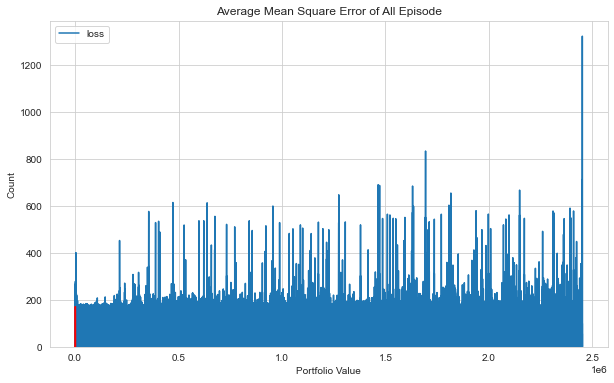

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

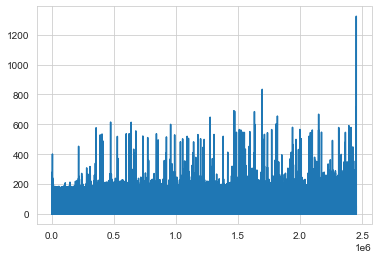

In [5]:
plt.plot(agent.model.losses)

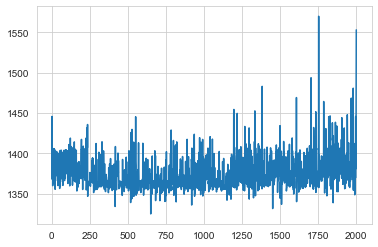

In [6]:
plt.plot(portfolio_value)

episode end value: 1140.79, duration: 0:00:00.109348
Sell: 364 times, Buy: 324 times


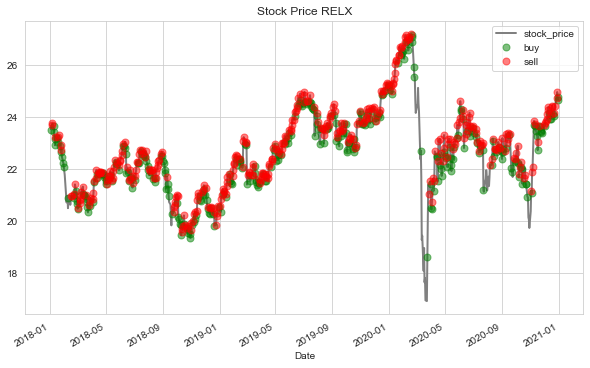

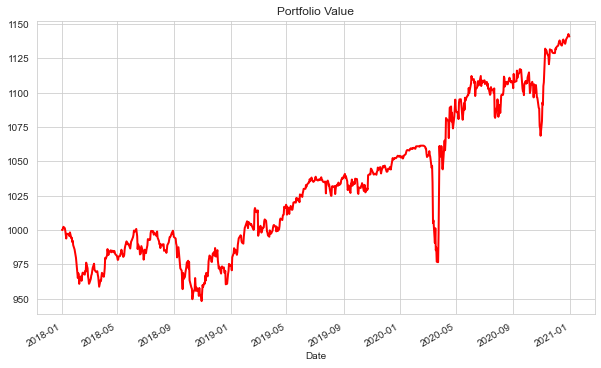

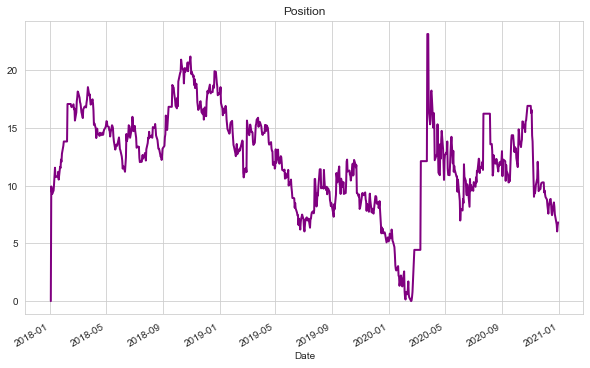

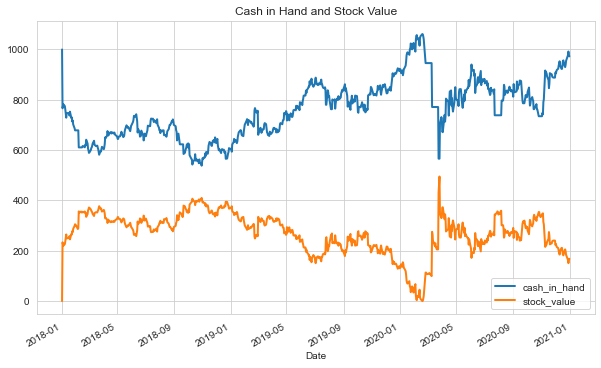

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: RELX
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.49 %
Volatility: 0.0707
shape ratio: 0.4796
Maximun drawdown: -7.99 %
Calmar ratio: 0.5616
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 1.40 %
Volatility (benchmark): 0.2567
shape ratio: 0.0118
Maximun drawdown: -37.75 %
Calmar ratio (benchmark): 0.0372


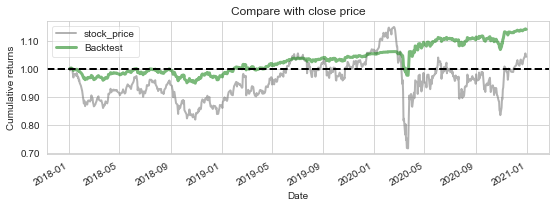

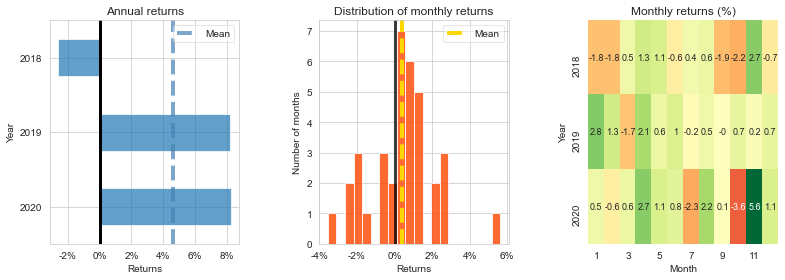

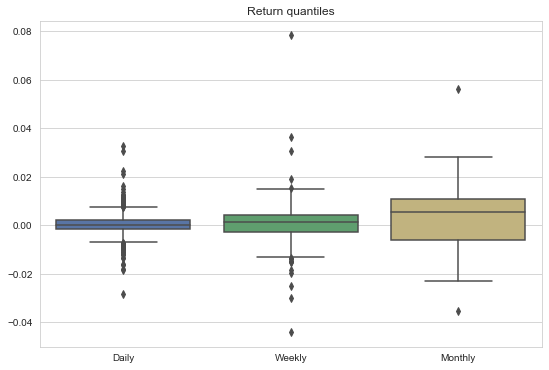

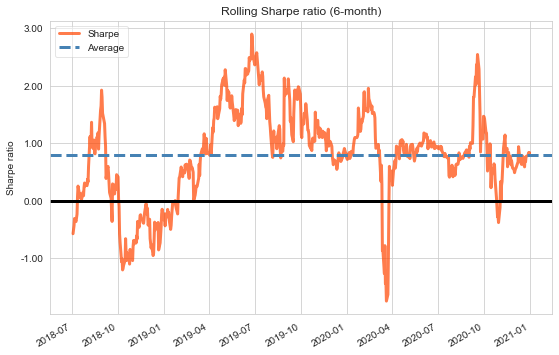

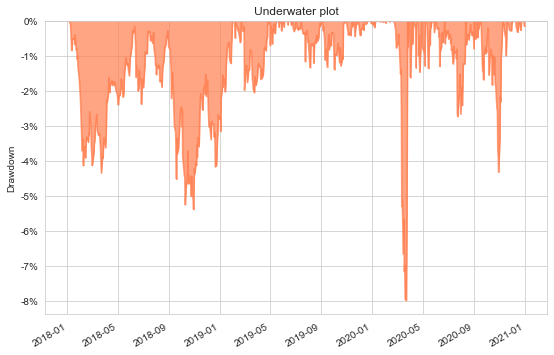

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')